In [14]:
import pandas as pd

!git clone https://github.com/pahwa1902/LearMachineLearning.git



fatal: destination path 'LearMachineLearning' already exists and is not an empty directory.


In [0]:
!cd LearMachineLearning

In [15]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import feature_column
tf.random.set_random_seed(512)
tf.executing_eagerly()
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [17]:

! ls LearMachineLearning


'data (1).csv'		        MARUTI.csv
 data.csv		        RegressionAnalysis.ipynb
 GOLD.csv		        SpamDetection.ipynb
 HDFCBANK.csv		        TCS.csv
 HINDALCO.csv		        Untitled6.ipynb
 ITC.csv		       'VisualizationMachineLearning (1).ipynb'
 MachineLearningProject.ipynb   VisualizationMachineLearning.ipynb


In [0]:
data = pd.read_csv("LearMachineLearning/HDFCBANK.csv")

In [19]:
data_pd = pd.DataFrame(data)
data_pd.head()
print(data_pd.columns)
data_pd['avgprice'] = data_pd['Average Price']
data_pd['volume'] = data_pd['Total Traded Quantity']
data_pd['totaltraded'] = data_pd['Total Traded Quantity']

Index(['Symbol', 'Series', 'Date', 'Prev Close', 'Open Price', 'High Price',
       'Low Price', 'Last Price', 'Close Price', 'Average Price',
       'Total Traded Quantity', 'Turnover', 'No. of Trades', 'Deliverable Qty',
       '% Dly Qt to Traded Qty'],
      dtype='object')


In [20]:
data_hd=data_pd[data_pd['Series']=="EQ"]
mean=data_hd[-90:]['Average Price'].mean()
maximum = data_hd[-90:]['Average Price'].max()
minimum= data_hd[-90:]['Average Price'].min()
index = [i for i in range(len(data_pd))]
print(len(index))
data_hdfc = pd.DataFrame(data_hd,index)

print(data_hdfc)

609
       Symbol Series         Date  ...  avgprice     volume  totaltraded
0    HDFCBANK     EQ  15-May-2017  ...   1550.73   701195.0     701195.0
1         NaN    NaN          NaN  ...       NaN        NaN          NaN
2    HDFCBANK     EQ  16-May-2017  ...   1555.11   897594.0     897594.0
3    HDFCBANK     EQ  17-May-2017  ...   1557.51   868118.0     868118.0
4         NaN    NaN          NaN  ...       NaN        NaN          NaN
..        ...    ...          ...  ...       ...        ...          ...
604  HDFCBANK     EQ  07-May-2019  ...   2338.90  2481051.0    2481051.0
605  HDFCBANK     EQ  08-May-2019  ...   2304.51  3016052.0    3016052.0
606  HDFCBANK     EQ  09-May-2019  ...   2287.67  2256931.0    2256931.0
607  HDFCBANK     EQ  10-May-2019  ...   2306.93  2648550.0    2648550.0
608  HDFCBANK     EQ  13-May-2019  ...   2297.73  2767908.0    2767908.0

[609 rows x 18 columns]


In [23]:

data_hdfc['Date'] = pd.to_datetime(data_hdfc['Date'])
print(data_hdfc['Date'].dtype)

datetime64[ns]


In [0]:
data_hdfc = data_hdfc.dropna()
data_hdfc = data_hdfc.reset_index(drop=True)
data_hdfc_copy = data_hdfc.copy()

In [0]:
date = data_hdfc['Date']
month = []
year = []
for i in range(0,len(data_hdfc)):
  
  datee = date[i].split("-")
  month.append(datee[1])
  year.append(datee[2])
data_hdfc['month'] = month
data_hdfc['year'] = year

In [24]:
data_hdfc['pricevolume'] = data_hdfc['avgprice']*data_hdfc['volume']

data_hdf = data_hdfc.groupby(['year','month']).pricevolume.agg([sum])
data_hdf['vol'] = data_hdfc.groupby(['year','month']).volume.agg([sum])
data_hdf['vwap'] = data_hdf['sum']/data_hdf['vol']
print(data_hdf)

                     sum         vol         vwap
year month                                       
2017 Aug    4.530067e+10  25634365.0  1767.185065
     Dec    5.523342e+10  29716571.0  1858.673990
     Jul    5.392299e+10  31346795.0  1720.207309
     Jun    3.895616e+10  23376096.0  1666.495681
     May    2.650154e+10  16610013.0  1595.515716
     Nov    4.665281e+10  25459963.0  1832.399125
     Oct    6.104812e+10  33680354.0  1812.573647
     Sep    7.050304e+10  39056437.0  1805.158131
2018 Apr    5.080188e+10  26318977.0  1930.237557
     Aug    1.077925e+11  51416350.0  2096.463573
     Dec    9.979939e+10  47497880.0  2101.133629
     Feb    5.218904e+10  27602788.0  1890.716324
     Jan    6.878462e+10  35760436.0  1923.483737
     Jul    1.100811e+11  51000163.0  2158.446639
     Jun    1.785253e+11  85691101.0  2083.359050
     Mar    5.284261e+10  28352209.0  1863.791575
     May    8.025579e+10  39518909.0  2030.820000
     Nov    1.376557e+11  68777510.0  2001.463649


In [0]:
def avgp(days):
  data_days = data_hdfc[-days:]
  return sum(data_days['avgprice'])/days

def avg(days):
  
  return (data_days[-1]['Close Price']/data_days[-days]['Close Price']-1)*100

In [26]:
closing = data_hdfc['Close Price']
data_hdfc['day_perc_change'] = closing.pct_change()
data_hdfc['day_perc_change'][0] = 0

data_hdfc = data_hdfc.reindex(columns=data_hdfc.columns.tolist() + ['trend'])
print(data_hdfc)

       Symbol Series       Date  ...   pricevolume  day_perc_change  trend
0    HDFCBANK     EQ 2017-05-15  ...  1.087364e+09         0.000000    NaN
1    HDFCBANK     EQ 2017-05-16  ...  1.395857e+09         0.004023    NaN
2    HDFCBANK     EQ 2017-05-17  ...  1.352102e+09        -0.001603    NaN
3    HDFCBANK     EQ 2017-05-18  ...  1.209501e+09        -0.000032    NaN
4    HDFCBANK     EQ 2017-05-19  ...  1.110922e+09         0.002665    NaN
..        ...    ...        ...  ...           ...              ...    ...
489  HDFCBANK     EQ 2019-05-07  ...  5.802930e+09        -0.002620    NaN
490  HDFCBANK     EQ 2019-05-08  ...  6.950522e+09        -0.006502    NaN
491  HDFCBANK     EQ 2019-05-09  ...  5.163113e+09        -0.007086    NaN
492  HDFCBANK     EQ 2019-05-10  ...  6.110019e+09         0.002444    NaN
493  HDFCBANK     EQ 2019-05-13  ...  6.359905e+09        -0.004050    NaN

[494 rows x 23 columns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
for i in range(len(data_hdfc)):
  if(-0.5<data_hdfc['day_perc_change'][i]<0.5):
    data_hdfc['trend'][i]= 'Slight or No change'
  if(0.5<data_hdfc['day_perc_change'][i]<1):
    data_hdfc['trend'][i]= 'Slight positive'
  if(-1<data_hdfc['day_perc_change'][i]<-0.5):
    data_hdfc['trend'][i] = 'Slight negative'
  if(1<data_hdfc['day_perc_change'][i]<3):
    data_hdfc['trend'][i] = 'Positive'
  if(-3<data_hdfc['day_perc_change'][i]<-1):
    data_hdfc['trend'][i] = 'Negative'
  if(3<data_hdfc['day_perc_change'][i]<7):
    data_hdfc['trend'][i] = 'Among top gainers'
  if(-7<data_hdfc['day_perc_change'][i]<-3):
    data_hdfc['trend'][i] = 'Among top losers'
  if(data_hdfc['day_perc_change'][i]>7):
    data_hdfc['trend'][i] = 'Bull run'
  if(data_hdfc['day_perc_change'][i]<-7):
    data_hdfc['trend'][i] = 'Bear drop'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
set(data_hdfc['trend'])

{'Slight or No change'}

In [28]:
data_trend = data_hdfc.groupby('trend').totaltraded.agg(['sum','median'])
data_trend['size'] = data_hdfc.groupby('trend').size()
data_trend['avg'] = data_trend['sum']/data_trend['size']
print(data_trend)

                              sum     median  size           avg
trend                                                           
Slight or No change  1.097272e+09  1773904.5   494  2.221199e+06


In [29]:

data_hdfc.reset_index(inplace=True)

data_hdfc.set_index('Date',inplace=True)
print(data_hdfc.index.dtype)

datetime64[ns]


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


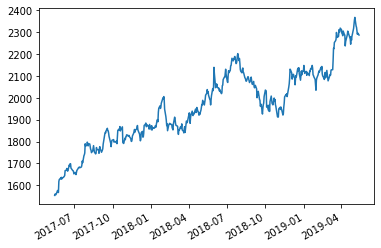

In [30]:
fig, ax = plt.subplots()

plt.plot(data_hdfc.index,data_hdfc['Close Price'])
#plt.xticks(datee)
ax.xaxis_date()
fig.autofmt_xdate()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


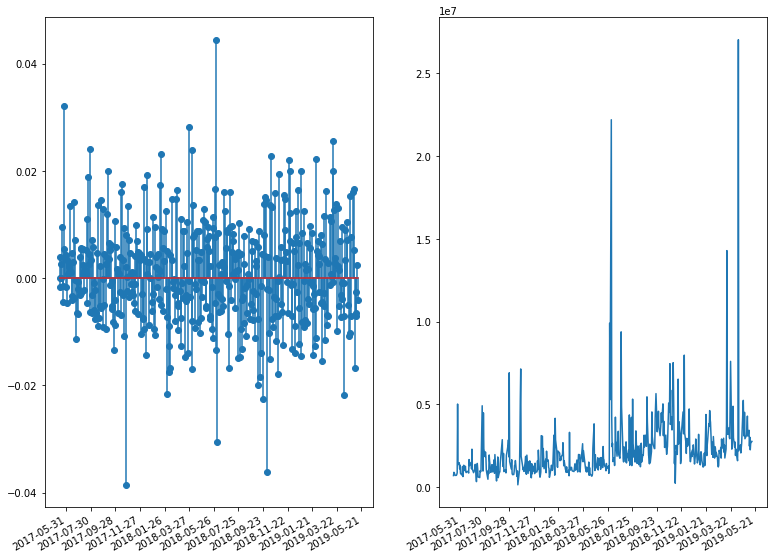

In [26]:
fig = plt.figure(figsize=(20,10))
#fig, ax = plt.subplots()
ax1 = plt.subplot(131)
ax1.stem(data_hdfc.index,data_hdfc['day_perc_change'])

ax2 = plt.subplot(132)
ax2.plot(data_hdfc.index,data_hdfc['volume'])

ax1.xaxis_date()
ax1.xaxis.set_major_locator(plt.MaxNLocator(15))
ax2.xaxis_date()
ax2.xaxis.set_major_locator(plt.MaxNLocator(15))
fig.autofmt_xdate()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


([<matplotlib.patches.Wedge at 0x7f2f47ace208>],
 [Text(-1.1, 1.3471114790620887e-16, 'Slight or No change')])

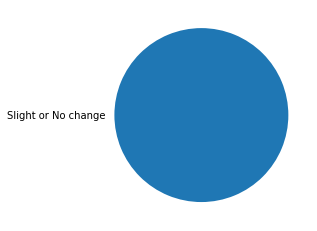

In [27]:

data_tr= data_hdfc.groupby(['trend']).size().reset_index(name='size')
size = []
for i in data_hdfc['trend'].unique():
  sizee = data_tr[data_tr['trend']==i]
  size.append(sizee['size']/len(data_hdfc)*100)

plt.pie(size,labels=data_hdfc['trend'].unique())


<BarContainer object of 1 artists>

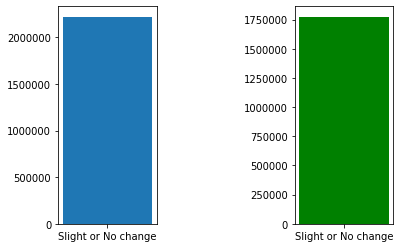

In [29]:
data_total = data_hdfc.groupby('trend').totaltraded.agg(['sum','median']).reset_index()
data_size = data_hdfc.groupby('trend').size().reset_index(name='size')
data_total['size'] = data_size['size']
data_total['avg'] = data_total['sum']/data_total['size']
ax1 = plt.subplot(131)
ax1.bar(data_total['trend'],height=data_total['avg'])
ax2 = plt.subplot(133)
ax2.bar(data_total['trend'],height=data_total['median'],color='green')

(array([  3.,   1.,  21.,  97., 172., 139.,  47.,  11.,   2.,   1.]),
 array([-0.03856248, -0.03025875, -0.02195502, -0.01365129, -0.00534756,
         0.00295617,  0.0112599 ,  0.01956363,  0.02786736,  0.03617109,
         0.04447482]),
 <a list of 10 Patch objects>)

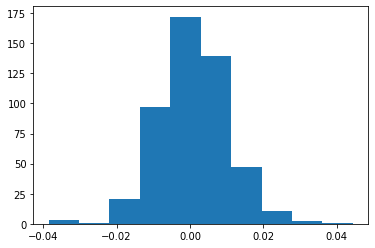

In [30]:
plt.hist(data_hdfc['day_perc_change'])

In [0]:
data1 = pd.read_csv("LearMachineLearning/MARUTI.csv")
data2 = pd.read_csv("LearMachineLearning/ITC.csv")
data3 = pd.read_csv("LearMachineLearning/TCS.csv")
data4 = pd.read_csv("LearMachineLearning/HINDALCO.csv")

In [0]:
data_maruti = pd.DataFrame(data1[data1['Series']=='EQ'])
data_ITC = pd.DataFrame(data2[data2['Series']=='EQ'])
data_TCS = pd.DataFrame(data3[data3['Series']=='EQ'])
data_hindalco = pd.DataFrame(data4[data4['Series']=='EQ'])

In [33]:
data_combined = pd.DataFrame({'hdfc':data_hdfc_copy['Close Price'],'maruti':data_maruti['Close Price'],'ITC':data_ITC['Close Price'],'TCS':data_TCS['Close Price'],'hindalco':data_hindalco['Close Price']})
data_combined.head()

,hdfc,maruti,ITC,TCS,hindalco
0,1553.40,6823.90,277.95,2365.10,198.45
1,1559.65,6953.95,283.45,2429.15,196.50
2,1557.15,6958.20,281.65,2455.35,198.85
3,1557.10,6831.05,277.90,2536.20,194.00
4,1561.25,6790.55,286.20,2507.15,191.00


In [34]:
data_maruti['perc_change'] = data_maruti['Close Price'].pct_change()
data_maruti['perc_change'][0] = 0
data_ITC['perc_change'] = data_ITC['Close Price'].pct_change()
data_ITC['perc_change'][0] = 0
data_TCS['perc_change'] = data_TCS['Close Price'].pct_change()
data_TCS['perc_change'][0]=0
data_hindalco['perc_change'] = data_hindalco['Close Price'].pct_change()
data_hindalco['perc_change'][0]=0
data_hdfc_copy['perc_change'] = data_hdfc_copy['Close Price'].pct_change()
data_hdfc_copy['perc_change'][0]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingW

In [35]:
data_corr = pd.DataFrame({'hdfc':data_hdfc_copy['perc_change'],'maruti':data_maruti['perc_change'],'ITC':data_ITC['perc_change'],'TCS':data_TCS['perc_change'],'hindalco':data_hindalco['perc_change']})
data_corr.head()

,hdfc,maruti,ITC,TCS,hindalco
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.004023,0.019058,0.019788,0.027081,-0.009826
2,-0.001603,0.000611,-0.006350,0.010786,0.011959
3,-0.000032,-0.018273,-0.013314,0.032928,-0.024390
4,0.002665,-0.005929,0.029867,-0.011454,-0.015464


/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


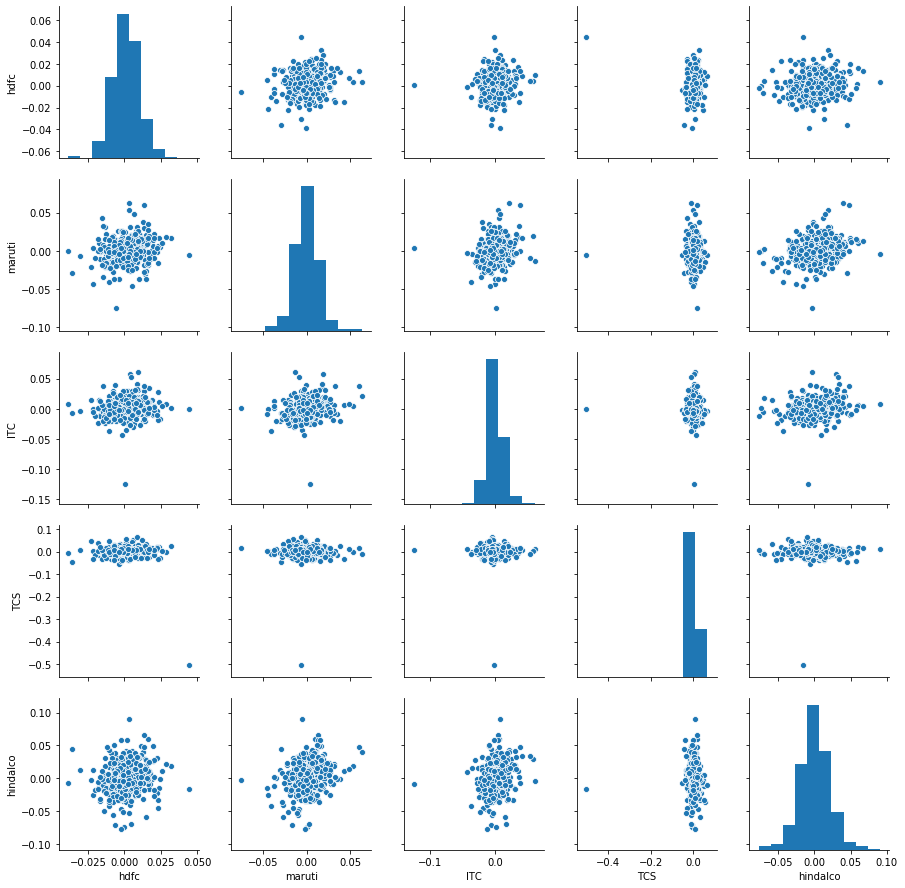

In [36]:
sns.pairplot(data_corr)

In [36]:
data_dev = data_corr.rolling(7).std()
print(data_dev)

         hdfc    maruti       ITC       TCS  hindalco
0         NaN       NaN       NaN       NaN       NaN
1         NaN       NaN       NaN       NaN       NaN
2         NaN       NaN       NaN       NaN       NaN
3         NaN       NaN       NaN       NaN       NaN
4         NaN       NaN       NaN       NaN       NaN
..        ...       ...       ...       ...       ...
493  0.007114  0.010139  0.010099  0.020242  0.012178
494       NaN  0.003981  0.009696  0.020037  0.012875
495       NaN  0.005849  0.011922  0.018381       NaN
496       NaN       NaN       NaN  0.017783       NaN
497       NaN       NaN       NaN  0.017012       NaN

[498 rows x 5 columns]


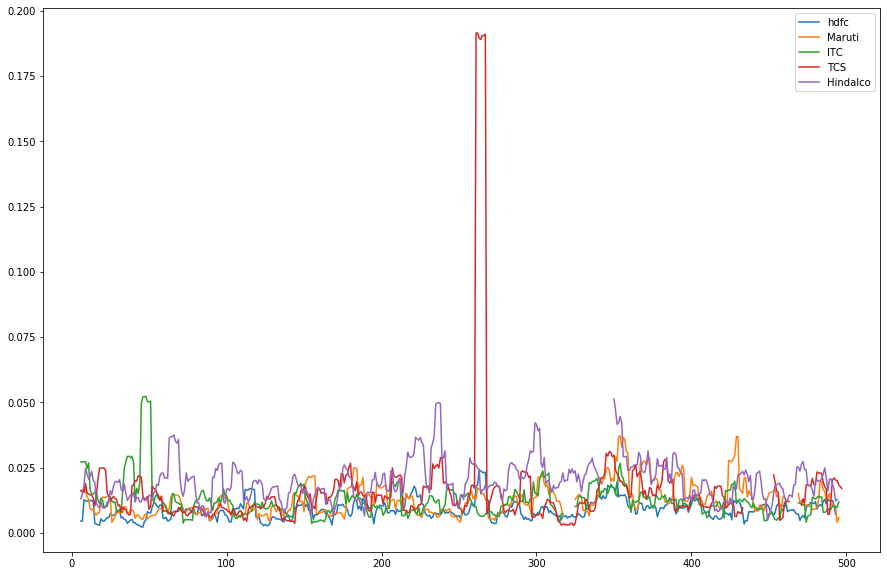

In [37]:
fig = plt.figure(figsize=(15,10))
plt.plot(data_dev['hdfc'],label="hdfc")
plt.plot(data_dev['maruti'],label='Maruti')
plt.plot(data_dev['ITC'],label='ITC')
plt.plot(data_dev['TCS'],label='TCS')
plt.plot(data_dev['hindalco'],label='Hindalco')
plt.legend()

In [38]:
data5 = pd.read_csv('LearMachineLearning/data.csv')
data6 = pd.read_csv('LearMachineLearning/data (1).csv')
print(data5.shape)
print(data5.shape)

(248, 7)
(248, 7)


In [39]:
data_comb = data5.append(data6)

data_nifty = pd.DataFrame(data_comb)
data_nifty.reset_index(inplace=True)

data_nifty['perc_change'] = data_nifty['Close'].pct_change()
data_nifty['perc_change'][0] = 0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [0]:
data_devv = data_nifty['perc_change'].rolling(7).std()

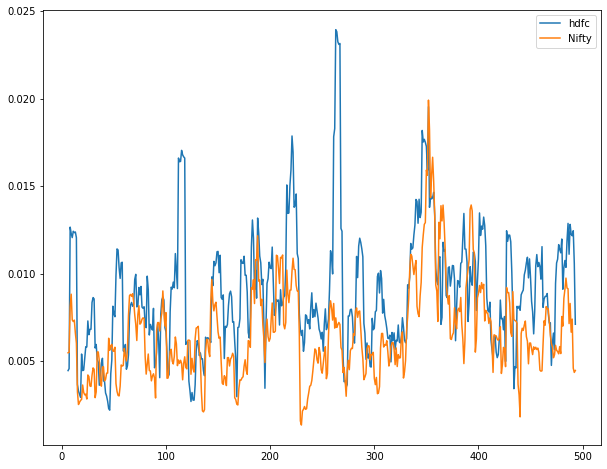

In [42]:
fig = plt.figure(figsize=(10,8))
plt.plot(data_dev['hdfc'],label='hdfc')
plt.plot(data_devv,label='Nifty')
plt.legend()

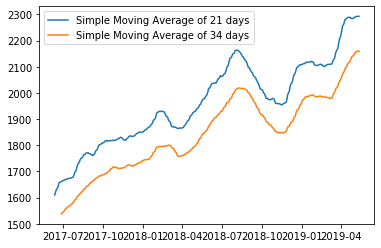

In [42]:
data_avg21 = data_hdfc['Close Price'].rolling(21).sum()/21
data_avg34 = data_hdfc['Close Price'].rolling(32).sum()/34
plt.plot(data_avg21,label='Simple Moving Average of 21 days')
plt.plot(data_avg34,label='Simple Moving Average of 34 days')
plt.legend()

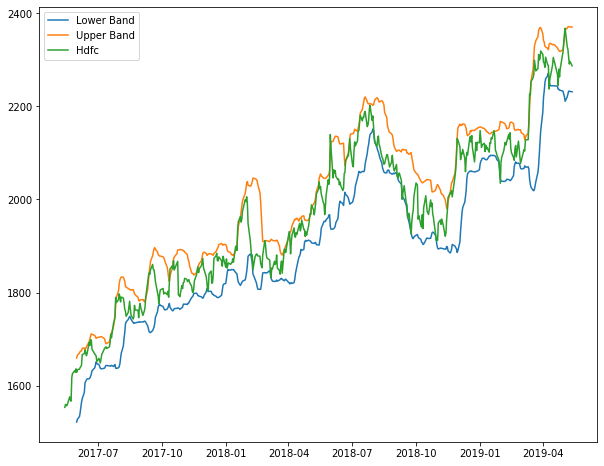

In [43]:
fig = plt.figure(figsize=(10,8))
data_sum = data_hdfc['Close Price'].rolling(14).sum()/14
data_devband = data_hdfc['Close Price'].rolling(14).std()
data_lband = data_sum-2*data_devband
data_uband = data_sum+2*data_devband
plt.plot(data_lband,label='Lower Band')
plt.plot(data_uband,label='Upper Band')
plt.plot(data_hdfc['Close Price'],label='Hdfc')
plt.legend()

In [44]:
data7 = pd.read_csv('LearMachineLearning/GOLD.csv')
data_gold = pd.DataFrame(data7)
data_gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318


In [0]:
data_train = data_gold.iloc[:,1:]
X = data_train.iloc[:,:4]
Y = data_train.iloc[:,7]


In [46]:
data_gold['Date'] = pd.to_datetime(data_gold['Date'])
data_gold.reset_index(inplace=True)
data_gold.set_index('Date',inplace=True)
data_gold['Vol.'].astype(str)
for i in range(len(data_gold)):
  data_gold['Vol.'][i] = float(data_gold['Vol.'][i][:-1])*1000

data_gold.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,index,Price,Open,High,Low,Vol.,Change %,Pred,new
Date,,,,,,,,,
2017-05-04,0,28060,28400,28482,28025,80,-1.79%,738.0,117.570740
2017-05-05,1,28184,28136,28382,28135,60,0.44%,-146.0,295.430176
2017-05-08,2,28119,28145,28255,28097,7850,-0.23%,30.0,132.123714
2017-05-09,3,27981,28125,28192,27947,10100,-0.49%,357.0,101.298064
2017-05-10,4,28007,28060,28146,27981,9280,0.09%,124.0,112.153318


In [47]:
from sklearn import linear_model
regression = linear_model.LinearRegression()
regression.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
pred = regression.predict(X)
predd = pd.DataFrame(pred,index=Y.index)
predd.index

RangeIndex(start=0, stop=512, step=1)

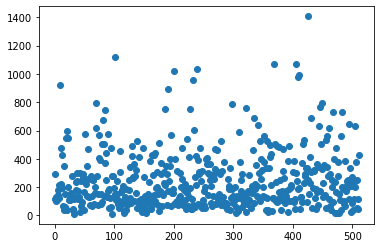

In [49]:
plt.scatter(Y.index,Y)

In [50]:
print(regression.coef_)

[ 1.01293825 -1.0003835   1.00503772 -1.01765453]


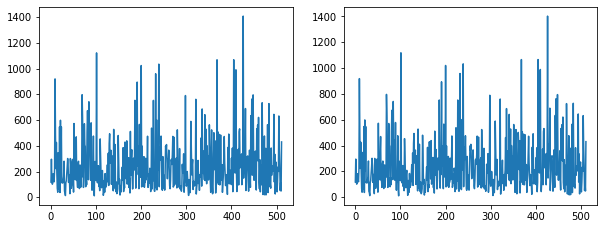

In [51]:
fig = plt.figure(figsize=(10,8))
ax5 = plt.subplot(2,2,1)
ax5.plot(Y)
ax6= plt.subplot(2,2,2)
ax6.plot(predd)


In [52]:

data_train_copy = data_train.copy()
nan = data_train['Pred'].isnull()
data_train_copy.dropna(inplace=True)
y2 = data_train_copy.iloc[:,6]
x = data_train_copy.iloc[:,:4]
linearRegressor = linear_model.LinearRegression()
linearRegressor.fit(x,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

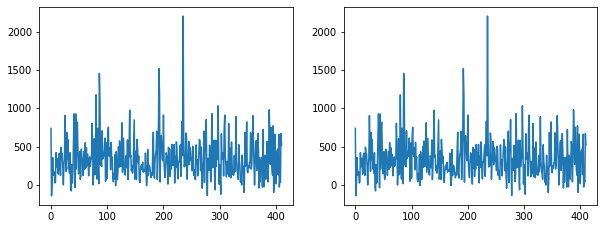

In [54]:
pred2 = linearRegressor.predict(x)
fig = plt.figure(figsize=(10,8))
ax5 = plt.subplot(2,2,1)
ax5.plot(y2)
ax6= plt.subplot(2,2,2)
ax6.plot(pred2)

In [55]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=3)
x_new = polynomial_features.fit_transform(x)
linearRegressor.fit(x_new,y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

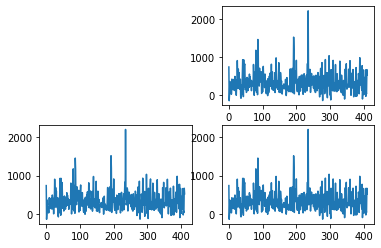

In [54]:
for i in range(2,5):
  polynomial_features = PolynomialFeatures(degree=i)
  x_model = polynomial_features.fit_transform(x)
  linearRegressor.fit(x_model,y2)
  pred = linearRegressor.predict(x_model)
  ax = plt.subplot(2,2,i)
  ax.plot(pred)

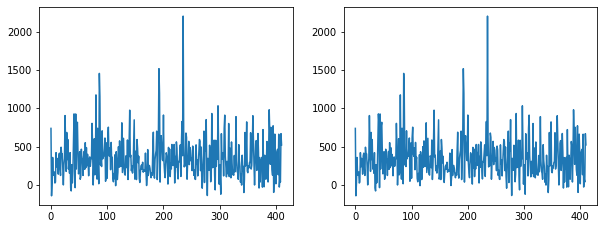

In [56]:
pred3 = linearRegressor.predict(x_new)
fig = plt.figure(figsize=(10,8))
ax7 = plt.subplot(2,2,1)
ax7.plot(y2)
ax8 = plt.subplot(2,2,2)
ax8.plot(pred3)

[[0.84932882]]


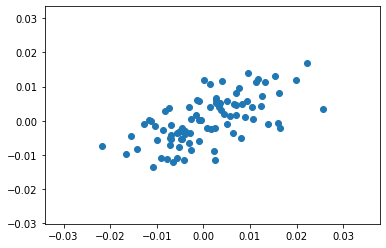

In [57]:
data_nifty['Date'] = pd.to_datetime(data_nifty['Date'])
data_nifty_copy3 = data_nifty.copy()
data_beta = data_hdfc.iloc[-90:]
data_nifty_copy3.reset_index(inplace=True)
data_nifty_copy3.set_index('Date',inplace=True)


data_nifty_beta = data_nifty.iloc[-90:]
data_nifty_beta.set_index('Date',inplace=True)
plt.scatter(data_beta['day_perc_change'],data_nifty_beta['perc_change'])

linear_regressor = linear_model.LinearRegression()
x=data_nifty_beta['perc_change'].values
y=data_beta['day_perc_change'].values
x = x.reshape(-1,1)
y = y.reshape(-1,1)

linear_regressor.fit(x,y)
print(linear_regressor.coef_)


In [0]:
data = data_nifty['Date']
data1 = data.astype(str)

month = []
year = []
day = []
for i in range(0,len(data1)):
  
  date = data1[i].split("-")
  month.append(date[1])
  year.append(date[0])
  day.append(date[2])


In [59]:
data_month = pd.DataFrame({'Date':data1,'Day':day,'Month':month,'Year':year,'Closing Price':data_nifty['Close']})
print(data_month)

           Date Day Month  Year  Closing Price
0    2017-05-15  15    05  2017        9445.40
1    2017-05-16  16    05  2017        9512.25
2    2017-05-17  17    05  2017        9525.75
3    2017-05-18  18    05  2017        9429.45
4    2017-05-19  19    05  2017        9427.90
..          ...  ..   ...   ...            ...
489  2019-05-07  07    05  2019       11497.90
490  2019-05-08  08    05  2019       11359.45
491  2019-05-09  09    05  2019       11301.80
492  2019-05-10  10    05  2019       11278.90
493  2019-05-13  13    05  2019       11148.20

[494 rows x 5 columns]


In [60]:
data_month_group = data_month.groupby(['Year','Month']).Day.agg([max])
data_month_group.sort_index(inplace=True)
data = data_month_group.index.tolist()
maxdate = data_month_group['max']

month=[]
year=[]
for i in range(len(data_month_group)):
  month.append(data[i][1])
  year.append(data[i][0])

data_monthly_beta = pd.DataFrame({'Year':year,'Month':month,'Max Date':data_month_group['max']})
data_monthly_beta.index = range(len(data_monthly_beta))
date = []
for i in range(len(data_monthly_beta)):
  date.append(str(data_monthly_beta.iloc[i]['Year'])+'-'+str(data_monthly_beta.iloc[i]['Month'])+'-'+str(data_monthly_beta.iloc[i]['Max Date']))
beta = []
for i in range(len(data_monthly_beta)):
  beta.append(int(data_month[data_month['Date']==date[i]]['Closing Price'].values))

data_monthly_beta['Closing Price'] = beta

data_monthly_beta['Monthly returns'] = data_monthly_beta['Closing Price'].pct_change()
data_monthly_beta['Monthly returns'][0]=0
print(data_monthly_beta)

    Year Month Max Date  Closing Price  Monthly returns
0   2017    05       31           9621         0.000000
1   2017    06       30           9520        -0.010498
2   2017    07       31          10077         0.058508
3   2017    08       31           9917        -0.015878
4   2017    09       29           9788        -0.013008
5   2017    10       31          10335         0.055885
6   2017    11       30          10226        -0.010547
7   2017    12       29          10530         0.029728
8   2018    01       31          11027         0.047198
9   2018    02       28          10492        -0.048517
10  2018    03       28          10113        -0.036123
11  2018    04       30          10739         0.061901
12  2018    05       31          10736        -0.000279
13  2018    06       29          10714        -0.002049
14  2018    07       31          11356         0.059922
15  2018    08       31          11680         0.028531
16  2018    09       28          10930        -0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
data_hdfc_copy['Date'] = pd.to_datetime(data_hdfc_copy['Date'])
data = data_hdfc_copy['Date']
data1 = data.astype(str)

month = []
year = []
day = []
for i in range(0,len(data1)):
  
  date = data1[i].split("-")
  month.append(date[1])
  year.append(date[0])
  day.append(date[2])

In [62]:
data_hdfc_month = pd.DataFrame({'Date':data1,'Day':day,'Month':month,'Year':year,'Closing Price':data_hdfc_copy['Close Price']})
print(data_hdfc_month)

           Date Day Month  Year  Closing Price
0    2017-05-15  15    05  2017        1553.40
1    2017-05-16  16    05  2017        1559.65
2    2017-05-17  17    05  2017        1557.15
3    2017-05-18  18    05  2017        1557.10
4    2017-05-19  19    05  2017        1561.25
..          ...  ..   ...   ...            ...
489  2019-05-07  07    05  2019        2322.35
490  2019-05-08  08    05  2019        2307.25
491  2019-05-09  09    05  2019        2290.90
492  2019-05-10  10    05  2019        2296.50
493  2019-05-13  13    05  2019        2287.20

[494 rows x 5 columns]


In [63]:
data_month_group = data_hdfc_month.groupby(['Year','Month']).Day.agg([max])
data_month_group.sort_index(inplace=True)
data = data_month_group.index.tolist()
maxdate = data_month_group['max']

month=[]
year=[]
for i in range(len(data_month_group)):
  month.append(data[i][1])
  year.append(data[i][0])

data_monthly_beta_hdfc = pd.DataFrame({'Year':year,'Month':month,'Max Date':data_month_group['max']})
data_monthly_beta_hdfc.index = range(len(data_monthly_beta_hdfc))
date = []
for i in range(len(data_monthly_beta_hdfc)):
  date.append(str(data_monthly_beta_hdfc.iloc[i]['Year'])+'-'+str(data_monthly_beta_hdfc.iloc[i]['Month'])+'-'+str(data_monthly_beta_hdfc.iloc[i]['Max Date']))
beta = []
for i in range(len(data_monthly_beta_hdfc)):
  beta.append(int(data_hdfc_month[data_hdfc_month['Date']==date[i]]['Closing Price'].values))

data_monthly_beta_hdfc['Closing Price'] = beta

data_monthly_beta_hdfc['Monthly returns'] = data_monthly_beta_hdfc['Closing Price'].pct_change()
data_monthly_beta_hdfc['Monthly returns'][0]=0
print(data_monthly_beta_hdfc)

    Year Month Max Date  Closing Price  Monthly returns
0   2017    05       31           1636         0.000000
1   2017    06       30           1652         0.009780
2   2017    07       31           1784         0.079903
3   2017    08       31           1776        -0.004484
4   2017    09       29           1805         0.016329
5   2017    10       31           1808         0.001662
6   2017    11       30           1853         0.024889
7   2017    12       29           1872         0.010254
8   2018    01       31           2005         0.071047
9   2018    02       28           1884        -0.060349
10  2018    03       28           1886         0.001062
11  2018    04       30           1944         0.030753
12  2018    05       31           2139         0.100309
13  2018    06       29           2108        -0.014493
14  2018    07       31           2179         0.033681
15  2018    08       31           2061        -0.054153
16  2018    09       28           2006        -0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [64]:
x=data_monthly_beta['Monthly returns'].values.reshape(-1,1)
y=data_monthly_beta_hdfc['Monthly returns'].values.reshape(-1,1)
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
print(linear_regression.coef_)

[[0.77332272]]


Beta value for daily returns is 0.84932
Beta value for monthly returns is 0.77332272

Beta values is less than 1.0 and is positive which implies that this stock is less risky and fluctuates positively with market.
Also as it is large market cap stock which can be seen by the beta value for daily returns is more than beta value for montly returns, while in case of small market cap stock beta value for daily returns is less than beta values for montly returns.

In [0]:
data_hdfc_duplicate = data_hdfc.copy()
data_hdfc_duplicate['lower band']=data_lband
data_hdfc_duplicate['upper band']=data_uband
data_hdfc_duplicate['middle band']=data_sum

In [67]:
data_hdfc_duplicate['lower band'].isnull().sum()


13

In [0]:
data_hdfc_duplicate.dropna(inplace=True)
data_hdfc_duplicate = data_hdfc_duplicate.reindex(columns=data_hdfc_duplicate.columns.tolist()+['Call'])
data_sub = data_hdfc_duplicate['Call']


In [69]:
for i in range(len(data_hdfc_duplicate)):
  if(data_hdfc_duplicate['Close Price'][i]<= data_hdfc_duplicate['lower band'][i]):
    data_hdfc_duplicate['Call'].iloc[i] = 'Buy'
  if(data_hdfc_duplicate['Close Price'][i]>= data_hdfc_duplicate['upper band'][i]):
    data_hdfc_duplicate['Call'].iloc[i]= 'Short'
  if(data_hdfc_duplicate['middle band'][i]>data_hdfc_duplicate['Close Price'][i]> data_hdfc_duplicate['lower band'][i]):
    data_hdfc_duplicate['Call'].iloc[i] = 'Hold Buy'
  if(data_hdfc_duplicate['middle band'][i]<data_hdfc_duplicate['Close Price'][i]<data_hdfc_duplicate['upper band'][i]):
    data_hdfc_duplicate['Call'].iloc[i] = 'Hold Short'

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [70]:
print(data_hdfc_duplicate)

            index    Symbol Series  ...   upper band  middle band        Call
Date                                ...                                      
2017-06-01     13  HDFCBANK     EQ  ...  1659.397901  1590.664286  Hold Short
2017-06-02     14  HDFCBANK     EQ  ...  1665.271715  1596.439286  Hold Short
2017-06-05     15  HDFCBANK     EQ  ...  1670.165227  1601.860714  Hold Short
2017-06-06     16  HDFCBANK     EQ  ...  1673.480625  1607.703571  Hold Short
2017-06-07     17  HDFCBANK     EQ  ...  1674.688481  1613.682143  Hold Short
...           ...       ...    ...  ...          ...          ...         ...
2019-05-07    489  HDFCBANK     EQ  ...  2370.682051  2298.778571  Hold Short
2019-05-08    490  HDFCBANK     EQ  ...  2371.114895  2301.778571  Hold Short
2019-05-09    491  HDFCBANK     EQ  ...  2371.152941  2301.928571    Hold Buy
2019-05-10    492  HDFCBANK     EQ  ...  2370.574455  2301.317857    Hold Buy
2019-05-13    493  HDFCBANK     EQ  ...  2370.418614  2300.85714

In [0]:
data_neural = pd.DataFrame({'lower_band':data_hdfc_duplicate['lower band'],'middle_band':data_hdfc_duplicate['middle band'],'upper_band':data_hdfc_duplicate['upper band'],'Difference':data_hdfc_duplicate['upper band']-data_hdfc_duplicate['lower band']})
label = data_hdfc_duplicate['Call']
data_neural.reset_index(inplace=True)
data_train = data_neural.iloc[:300,1:]
data_validate = data_neural.iloc[300:400,1:]
data_test = data_neural.iloc[400:,1:]
label = label.reset_index()
train_label = label.iloc[:300,1:]
val_label = label.iloc[300:400,1:]
test_label = label.iloc[400:,1:]


In [0]:
def str_2int(data):
  label=[]
  for i in range(len(data)):
    if(data.iloc[i]=='Buy').any():
      label.append(0)
    if(data.iloc[i]=='Short').any():
      label.append(3)
    if(data.iloc[i]=='Hold Buy').any():
      label.append(1)
    if(data.iloc[i]=='Hold Short').any():
      label.append(2)

  return label

In [73]:
train_labelset = str_2int(train_label)
test_labelset = str_2int(test_label)
val_labelset = str_2int(val_label)
print(test_labelset)

[1, 1, 2, 2, 2, 2, 3, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 3, 3, 2, 2, 2, 1, 1, 1]


In [0]:
train_dataset = tf.data.Dataset.from_tensor_slices((dict(data_train),train_labelset))

In [0]:
test_dataset = tf.data.Dataset.from_tensor_slices((dict(data_test),test_labelset))
validate_dataset = tf.data.Dataset.from_tensor_slices((dict(data_validate),val_labelset))
testable_dataset = test_dataset.batch(10)

In [0]:
trainable_dataset = train_dataset.shuffle(len(data_train)).batch(10)

In [0]:
validate_dataset = validate_dataset.shuffle(len(data_validate)).batch(10)


In [184]:
feature_columns = []
for i in data_train.columns:
  feature_columns.append(feature_column.numeric_column(i))
print(feature_columns)

[NumericColumn(key='lower_band', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='middle_band', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='upper_band', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='Difference', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [0]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [0]:
tf.random.set_random_seed(1)

In [0]:
model = tf.keras.Sequential()
model.add(feature_layer)
model.add(tf.keras.layers.Dense(32,activation='sigmoid'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(8,activation='sigmoid'))
model.add(tf.keras.layers.Dense(4,activation='softmax'))



In [0]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [206]:
history = model.fit(trainable_dataset,epochs=20,validation_data=validate_dataset,verbose=1)

Train on 30 steps, validate on 10 steps
Epoch 1/20
30/30 [==============================] - 1s 43ms/step - loss: 1.6331 - acc: 0.1933 - val_loss: 1.3443 - val_acc: 0.5600
Epoch 2/20
30/30 [==============================] - 0s 2ms/step - loss: 1.4234 - acc: 0.3300 - val_loss: 1.2104 - val_acc: 0.5600
Epoch 3/20
30/30 [==============================] - 0s 2ms/step - loss: 1.2811 - acc: 0.3733 - val_loss: 1.1320 - val_acc: 0.5600
Epoch 4/20
30/30 [==============================] - 0s 2ms/step - loss: 1.1994 - acc: 0.3867 - val_loss: 1.0896 - val_acc: 0.3700
Epoch 5/20
30/30 [==============================] - 0s 2ms/step - loss: 1.1138 - acc: 0.4633 - val_loss: 1.0671 - val_acc: 0.3700
Epoch 6/20
30/30 [==============================] - 0s 2ms/step - loss: 1.0738 - acc: 0.5000 - val_loss: 1.0544 - val_acc: 0.3700
Epoch 7/20
30/30 [==============================] - 0s 3ms/step - loss: 1.0476 - acc: 0.5233 - val_loss: 1.0497 - val_acc: 0.3700
Epoch 8/20
30/30 [==============================]

In [207]:
loss,accuracy = model.evaluate(testable_dataset)

9/9 [==============================] - 1s 58ms/step - loss: 1.0194 - acc: 0.5432


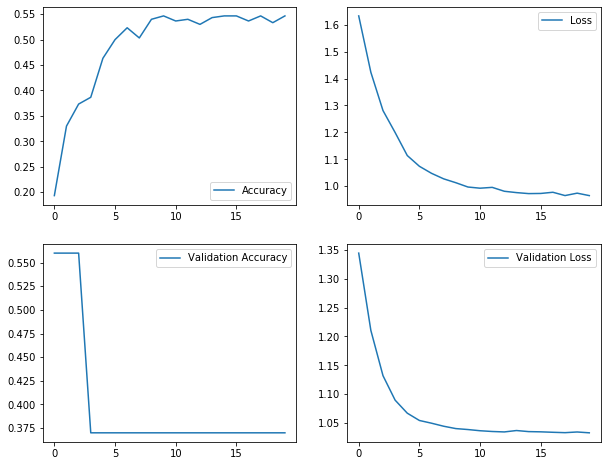

In [208]:
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
epoch = range(20)
plt.figure(figsize=(10,8))
ax1 = plt.subplot(2,2,1)
ax1.plot(epoch,acc,label='Accuracy')
plt.legend()
ax2 = plt.subplot(2,2,2)

ax2.plot(epoch,loss,label='Loss')
plt.legend()
ax3 = plt.subplot(2,2,3)

ax3.plot(epoch,val_acc,label='Validation Accuracy')
plt.legend()
ax4 = plt.subplot(2,2,4)
ax4.plot(epoch,val_loss,label='Validation Loss')
plt.legend()

In [170]:
model.predict(example_batch)

array([[1.49926883e-17, 3.49744111e-01, 6.49432063e-01, 8.23803188e-04],
       [2.02010472e-18, 4.46094155e-01, 5.53447723e-01, 4.58087306e-04],
       [2.00246240e-18, 4.46592301e-01, 5.52950859e-01, 4.56866663e-04],
       [1.40386695e-18, 4.63314325e-01, 5.36274374e-01, 4.11317946e-04],
       [1.99453698e-18, 4.45069164e-01, 5.54472566e-01, 4.58207884e-04],
       [2.49986782e-18, 4.33273852e-01, 5.66235006e-01, 4.91103390e-04],
       [2.51395822e-18, 4.32958961e-01, 5.66549182e-01, 4.91825922e-04],
       [3.56972813e-18, 4.15071875e-01, 5.84381342e-01, 5.46823954e-04],
       [4.74133020e-18, 4.01522458e-01, 5.97883403e-01, 5.94124314e-04],
       [8.07062008e-18, 3.76662970e-01, 6.22644246e-01, 6.92775007e-04],
       [1.81764635e-17, 3.39791119e-01, 6.59336388e-01, 8.72555014e-04],
       [6.73198559e-17, 2.82644391e-01, 7.16097236e-01, 1.25837582e-03],
       [2.94708491e-15, 1.52085260e-01, 8.44492376e-01, 3.42230010e-03],
       [3.85062994e-13, 5.92439175e-02, 9.29393053e

In [237]:
decision_tree = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=0)
decision_tree.fit(data_train,train_labelset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [0]:
prediction = decision_tree.predict(data_test)

In [239]:
confusion_matrix(test_labelset,prediction)

array([[ 0,  1,  2,  0],
       [ 0, 11, 17,  0],
       [ 0, 16, 28,  0],
       [ 0,  2,  4,  0]])

In [240]:
classification_report(test_labelset,prediction)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00         3\n           1       0.37      0.39      0.38        28\n           2       0.55      0.64      0.59        44\n           3       0.00      0.00      0.00         6\n\n    accuracy                           0.48        81\n   macro avg       0.23      0.26      0.24        81\nweighted avg       0.42      0.48      0.45        81\n'

In [154]:
support_model = SVC(random_state=0)
support_model.fit(data_train,train_label)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
prediction = support_model.predict(data_test)

In [156]:
confusion_matrix(test_label,prediction)
classification_report(test_label,prediction)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


'              precision    recall  f1-score   support\n\n         Buy       0.00      0.00      0.00         3\n    Hold Buy       0.00      0.00      0.00        28\n  Hold Short       0.54      1.00      0.70        44\n       Short       0.00      0.00      0.00         6\n\n    accuracy                           0.54        81\n   macro avg       0.14      0.25      0.18        81\nweighted avg       0.30      0.54      0.38        81\n'

In [157]:
knn = KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(data_train,train_label)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [0]:
prediction = knn.predict(data_test)

In [159]:
confusion_matrix(test_label,prediction)
classification_report(test_label,prediction)
accuracy_score(test_label,prediction)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.4691358024691358

In [368]:
randomForest_new = RandomForestClassifier(n_estimators=100,max_depth=4,criterion='entropy')
randomForest_new.fit(data_train,train_label)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predict = randomForest_new.predict(data_test)

In [370]:
accuracy_score(test_label,predict)

0.49382716049382713

In [397]:
data_hdfc_random = data_hdfc.copy()
data_hdfc_random['openclose'] = (data_hdfc_random['Close Price']/data_hdfc_random['Open Price']-1)*100
data_hdfc_random['lowhigh'] = (data_hdfc_random['High Price']/data_hdfc_random['Low Price']-1)*100
data_hdfc_random['movingaverage'] = data_hdfc_random['day_perc_change'].rolling(5).sum()/5
data_hdfc_random['movingdeviation'] = data_hdfc_random['day_perc_change'].rolling(5).std()
print(data_hdfc_random)

            index    Symbol Series  ...   lowhigh  movingaverage  movingdeviation
Date                                ...                                          
2017-05-15      0  HDFCBANK     EQ  ...  0.969363            NaN              NaN
2017-05-16      1  HDFCBANK     EQ  ...  0.888099            NaN              NaN
2017-05-17      2  HDFCBANK     EQ  ...  0.895907            NaN              NaN
2017-05-18      3  HDFCBANK     EQ  ...  0.865577            NaN              NaN
2017-05-19      4  HDFCBANK     EQ  ...  1.595211       0.001011         0.002278
...           ...       ...    ...  ...       ...            ...              ...
2019-05-07    489  HDFCBANK     EQ  ...  1.725626       0.003681         0.013909
2019-05-08    490  HDFCBANK     EQ  ...  1.564685      -0.000819         0.012495
2019-05-09    491  HDFCBANK     EQ  ...  1.250220      -0.005546         0.007912
2019-05-10    492  HDFCBANK     EQ  ...  1.464202      -0.006089         0.007039
2019-05-13    49

In [272]:
data_hdfc_random.dropna(inplace=True)
print(data_hdfc_random)

            index    Symbol Series  ...   lowhigh  movingaverage  movingdeviation
Date                                ...                                          
2017-05-19      4  HDFCBANK     EQ  ...  1.595211       0.001011         0.002278
2017-05-22      5  HDFCBANK     EQ  ...  1.081185       0.002900         0.004274
2017-05-23      6  HDFCBANK     EQ  ...  1.185304       0.001220         0.005260
2017-05-24      7  HDFCBANK     EQ  ...  0.861076       0.001241         0.005246
2017-05-25      8  HDFCBANK     EQ  ...  3.975496       0.007681         0.014642
...           ...       ...    ...  ...       ...            ...              ...
2019-05-07    489  HDFCBANK     EQ  ...  1.725626       0.003681         0.013909
2019-05-08    490  HDFCBANK     EQ  ...  1.564685      -0.000819         0.012495
2019-05-09    491  HDFCBANK     EQ  ...  1.250220      -0.005546         0.007912
2019-05-10    492  HDFCBANK     EQ  ...  1.464202      -0.006089         0.007039
2019-05-13    49

In [0]:
data_hdfc_random = data_hdfc_random.reindex(columns=data_hdfc_random.columns.tolist()+['Action'])

In [274]:
for i in range(len(data_hdfc_random)-1):
  if(data_hdfc_random.iloc[i]<data_hdfc_random.iloc[i+1]).any():
    data_hdfc_random['Action'].iloc[i] = 1
  if(data_hdfc_random.iloc[i]>data_hdfc_random.iloc[i+1]).any():
    data_hdfc_random['Action'].iloc[i] = -1

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [276]:
data_hdfc_random.dropna(inplace=True)
data_hdfc_random.isnull().sum()

index                     0
Symbol                    0
Series                    0
Prev Close                0
Open Price                0
High Price                0
Low Price                 0
Last Price                0
Close Price               0
Average Price             0
Total Traded Quantity     0
Turnover                  0
No. of Trades             0
Deliverable Qty           0
% Dly Qt to Traded Qty    0
avgprice                  0
volume                    0
totaltraded               0
month                     0
year                      0
pricevolume               0
day_perc_change           0
trend                     0
openclose                 0
lowhigh                   0
movingaverage             0
movingdeviation           0
Action                    0
dtype: int64

In [0]:

target = data_hdfc_random.pop('Action')
train = pd.DataFrame({'OpenClose':data_hdfc_random['openclose'],'HighLow':data_hdfc_random['lowhigh'],'MovingAvg':data_hdfc_random['movingaverage'],'MovingDev':data_hdfc_random['movingdeviation']})

In [279]:
print(len(train))

489


In [0]:
train_data = train.iloc[:380,:]
target_data = target[:380]
test_data = train.iloc[380:,:]
target_test = target[380:]

In [375]:
randomforest = RandomForestClassifier(n_estimators=100,max_depth=8,criterion='entropy')
randomforest.fit(train_data,target_data)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predict = randomforest.predict(test_data)

In [377]:
mean_squared_error(target_test,predict)

0.07339449541284404

In [378]:
accuracy_score(target_test,predict)

0.981651376146789

In [0]:
data_hdfc_random = data_hdfc_random.reindex(columns=data_hdfc_random.columns.tolist()+['Cummulative'])

In [403]:

for i in range(1,len(data_hdfc_random)):
  data_hdfc_random['Cummulative'].iloc[0]=data_hdfc_random['day_perc_change'].iloc[0]
  data_hdfc_random['Cummulative'].iloc[i] = (data_hdfc_random['day_perc_change'].iloc[i])+(data_hdfc_random['Cummulative'].iloc[i-1])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
data_hdfc_random.dropna(inplace=True)
data_hdfc_random.reset_index(inplace=True)

In [404]:
print(data_hdfc_random)

          Date  index    Symbol  ... movingaverage  movingdeviation  Cummulative
0   2017-05-19      4  HDFCBANK  ...      0.001011         0.002278     0.002665
1   2017-05-22      5  HDFCBANK  ...      0.002900         0.004274     0.012113
2   2017-05-23      6  HDFCBANK  ...      0.001220         0.005260     0.007735
3   2017-05-24      7  HDFCBANK  ...      0.001241         0.005246     0.006237
4   2017-05-25      8  HDFCBANK  ...      0.007681         0.014642     0.038405
..         ...    ...       ...  ...           ...              ...          ...
485 2019-05-07    489  HDFCBANK  ...      0.003681         0.013909     0.421848
486 2019-05-08    490  HDFCBANK  ...     -0.000819         0.012495     0.415346
487 2019-05-09    491  HDFCBANK  ...     -0.005546         0.007912     0.408260
488 2019-05-10    492  HDFCBANK  ...     -0.006089         0.007039     0.410704
489 2019-05-13    493  HDFCBANK  ...     -0.003563         0.003817     0.406654

[490 rows x 29 columns]


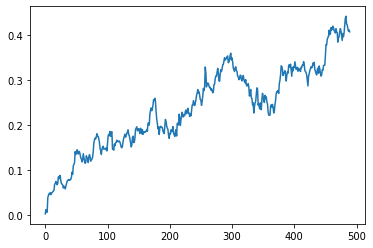

In [405]:
plt.plot(data_hdfc_random['Cummulative'])